# Week 12 - Milestone Two week

In [1]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score

# Load data
df = pd.read_csv("austinHousingData.csv")

# Select relevant numerical features and drop missing values
df_model = df[["latestPrice", "livingAreaSqFt", "numOfBedrooms", "numOfBathrooms"]].dropna()

# Define features and target
X = df_model[["livingAreaSqFt", "numOfBedrooms", "numOfBathrooms"]]
y = df_model["latestPrice"]

# Create polynomial and interaction terms (degree=2)
poly = PolynomialFeatures(degree=2, include_bias=False)
X_poly = poly.fit_transform(X)

# Get the names of the new features
feature_names = poly.get_feature_names_out(X.columns)

# Split into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X_poly, y, test_size=0.2, random_state=42)

# Fit linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
r2 = r2_score(y_test, y_pred)

# Print R² and feature names
print(f"R² Score: {r2:.3f}")
print("Polynomial and Interaction Terms:")
for name in feature_names:
    print(f"- {name}")

R² Score: 0.401
Polynomial and Interaction Terms:
- livingAreaSqFt
- numOfBedrooms
- numOfBathrooms
- livingAreaSqFt^2
- livingAreaSqFt numOfBedrooms
- livingAreaSqFt numOfBathrooms
- numOfBedrooms^2
- numOfBedrooms numOfBathrooms
- numOfBathrooms^2


In [3]:
# Calculate percentage of missing values for each column
missing_percent = df.isnull().mean().sort_values(ascending=False) * 100

# Flag features with more than 60% missing values
high_missing = missing_percent[missing_percent > 60]

# Display high-missing columns and their percentage
high_missing


Series([], dtype: float64)

In [4]:
missing_percent

description                   0.013183
city                          0.000000
zpid                          0.000000
streetAddress                 0.000000
zipcode                       0.000000
latitude                      0.000000
longitude                     0.000000
propertyTaxRate               0.000000
garageSpaces                  0.000000
hasAssociation                0.000000
hasCooling                    0.000000
hasGarage                     0.000000
hasHeating                    0.000000
hasSpa                        0.000000
hasView                       0.000000
homeType                      0.000000
parkingSpaces                 0.000000
yearBuilt                     0.000000
latestPrice                   0.000000
numPriceChanges               0.000000
latest_saledate               0.000000
latest_salemonth              0.000000
latest_saleyear               0.000000
latestPriceSource             0.000000
numOfPhotos                   0.000000
numOfAccessibilityFeature

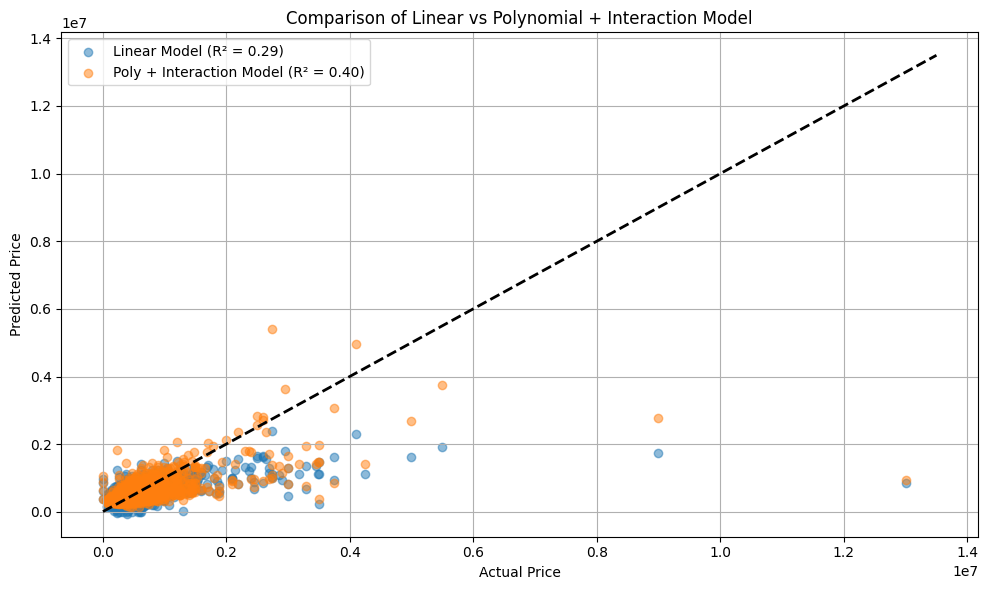

In [5]:
import matplotlib.pyplot as plt
from sklearn.pipeline import make_pipeline

# Baseline linear regression model (no polynomial or interaction terms)
X_base = X.values
X_train_base, X_test_base, y_train_base, y_test_base = train_test_split(X_base, y, test_size=0.2, random_state=42)
model_base = LinearRegression()
model_base.fit(X_train_base, y_train_base)
y_pred_base = model_base.predict(X_test_base)
r2_base = r2_score(y_test_base, y_pred_base)

# Plot comparison of predicted vs actual for both models
plt.figure(figsize=(10, 6))
plt.scatter(y_test_base, y_pred_base, alpha=0.5, label=f'Linear Model (R² = {r2_base:.2f})')
plt.scatter(y_test, y_pred, alpha=0.5, label=f'Poly + Interaction Model (R² = {r2:.2f})')
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'k--', lw=2)
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title("Comparison of Linear vs Polynomial + Interaction Model")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


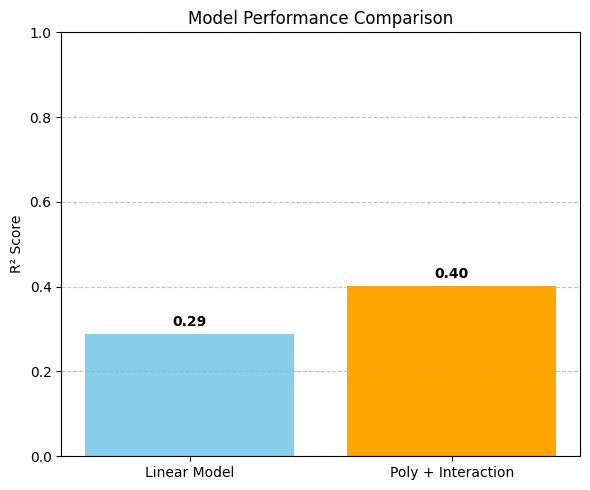

In [6]:
# Plot side-by-side bar chart of R² scores for visual comparison

plt.figure(figsize=(6, 5))
models = ['Linear Model', 'Poly + Interaction']
r2_scores = [r2_base, r2]

plt.bar(models, r2_scores, color=['skyblue', 'orange'])
plt.ylabel("R² Score")
plt.title("Model Performance Comparison")
plt.ylim(0, 1)
for i, v in enumerate(r2_scores):
    plt.text(i, v + 0.02, f"{v:.2f}", ha='center', fontweight='bold')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


In [8]:
from sklearn.linear_model import LassoCV, RidgeCV, ElasticNetCV
from sklearn.preprocessing import StandardScaler

# Standardize features for regularization methods
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split data
X_train_reg, X_test_reg, y_train_reg, y_test_reg = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Lasso Regression with cross-validation
lasso = LassoCV(cv=5, random_state=42)
lasso.fit(X_train_reg, y_train_reg)
r2_lasso = r2_score(y_test_reg, lasso.predict(X_test_reg))

# Ridge Regression with cross-validation
ridge = RidgeCV(cv=5)
ridge.fit(X_train_reg, y_train_reg)
r2_ridge = r2_score(y_test_reg, ridge.predict(X_test_reg))

# Elastic Net Regression with cross-validation
elastic_net = ElasticNetCV(cv=5, random_state=42)
elastic_net.fit(X_train_reg, y_train_reg)
r2_elastic = r2_score(y_test_reg, elastic_net.predict(X_test_reg))

# Prepare results
r2_lasso, r2_ridge, r2_elastic


(0.21767280563932923, 0.2872323747540879, 0.00418277197243766)

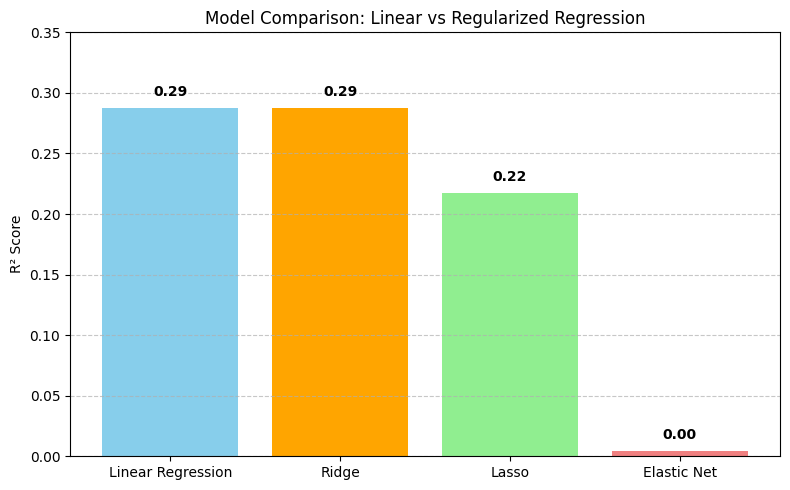

In [9]:
# Evaluate linear regression on the same standardized features
model_linear_std = LinearRegression()
model_linear_std.fit(X_train_reg, y_train_reg)
r2_linear_std = r2_score(y_test_reg, model_linear_std.predict(X_test_reg))

# Gather results for all models
model_names = ['Linear Regression', 'Ridge', 'Lasso', 'Elastic Net']
r2_scores_all = [r2_linear_std, r2_ridge, r2_lasso, r2_elastic]

# Plot bar chart for comparison
plt.figure(figsize=(8, 5))
bars = plt.bar(model_names, r2_scores_all, color=['skyblue', 'orange', 'lightgreen', 'lightcoral'])
plt.ylabel("R² Score")
plt.title("Model Comparison: Linear vs Regularized Regression")
plt.ylim(0, 0.35)

# Annotate bars with scores
for bar, score in zip(bars, r2_scores_all):
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height() + 0.01, f"{score:.2f}", ha='center', fontweight='bold')

plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


In [3]:
# Re-import necessary libraries and reload the dataset after environment reset
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, r2_score

# Reload the dataset
file_path = "austinHousingData.csv"
df = pd.read_csv(file_path)

# Select features and target
features = [
    'garageSpaces', 'parkingSpaces', 'yearBuilt', 'numPriceChanges', 'numOfPhotos',
    'lotSizeSqFt', 'livingAreaSqFt', 'avgSchoolDistance', 'avgSchoolRating',
    'avgSchoolSize', 'MedianStudentsPerTeacher', 'numOfBathrooms', 'numOfBedrooms'
]
target = 'latestPrice'

X = df[features]
y = df[target]

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and fit decision tree
dt_model = DecisionTreeRegressor(random_state=42)
dt_model.fit(X_train, y_train)
y_pred_dt = dt_model.predict(X_test)

# Initialize and fit random forest with hyperparameter tuning
param_grid = {
    'n_estimators': [50, 100],
    'max_depth': [10, 20, None],
    'min_samples_split': [2, 5]
}
rf = RandomForestRegressor(random_state=42)
grid_search = GridSearchCV(rf, param_grid, cv=3, scoring='r2', n_jobs=-1)
grid_search.fit(X_train, y_train)
best_rf_model = grid_search.best_estimator_
y_pred_rf = best_rf_model.predict(X_test)

# Evaluate both models
dt_r2 = r2_score(y_test, y_pred_dt)
rf_r2 = r2_score(y_test, y_pred_rf)
dt_rmse = mean_squared_error(y_test, y_pred_dt, squared=False)
rf_rmse = mean_squared_error(y_test, y_pred_rf, squared=False)

(dt_r2, dt_rmse, rf_r2, rf_rmse, grid_search.best_params_)


TypeError: got an unexpected keyword argument 'squared'

In [4]:
from sklearn.svm import SVR
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler

# Scale the data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Create and train the SVR model
svr = SVR(kernel='linear')
svr.fit(X_train_scaled, y_train)

# Make predictions on the testing set
y_pred = svr.predict(X_test_scaled)

# Evaluate the performance of the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print('RMSE:', np.sqrt(mse))
print('R2:', r2)

RMSE: 490317.93757624726
R2: -0.015791249436140298


In [5]:
X

,garageSpaces,parkingSpaces,yearBuilt,numPriceChanges,numOfPhotos,lotSizeSqFt,livingAreaSqFt,avgSchoolDistance,avgSchoolRating,avgSchoolSize,MedianStudentsPerTeacher,numOfBathrooms,numOfBedrooms
0,2,2,2012,5,39,6011.0,2601.0,1.266667,2.666667,1063,14,3.0,4
1,2,2,2013,1,29,6185.0,1768.0,1.400000,2.666667,1063,14,2.0,4
2,0,0,2018,1,2,7840.0,1478.0,1.200000,3.000000,1108,14,2.0,3
3,2,2,2013,4,9,6098.0,1678.0,1.400000,2.666667,1063,14,2.0,3
4,0,0,2002,3,27,6708.0,2132.0,1.133333,4.000000,1223,14,3.0,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...
15166,6,6,1986,1,49,6534.0,1234.0,0.900000,3.333333,1424,14,2.0,3
15167,2,2,2016,1,32,2439.0,1888.0,1.900000,6.666667,1226,16,4.0,3
15168,2,2,1936,7,20,9408.0,1524.0,0.800000,5.000000,889,13,3.0,3
15169,0,0,1968,5,15,6098.0,6068.0,1.300000,6.666667,1057,15,2.0,4


In [6]:
y

0        305000.0
1        295000.0
2        256125.0
3        240000.0
4        239900.0
           ...   
15166    330000.0
15167    550000.0
15168    875000.0
15169    420000.0
15170    374900.0
Name: latestPrice, Length: 15171, dtype: float64

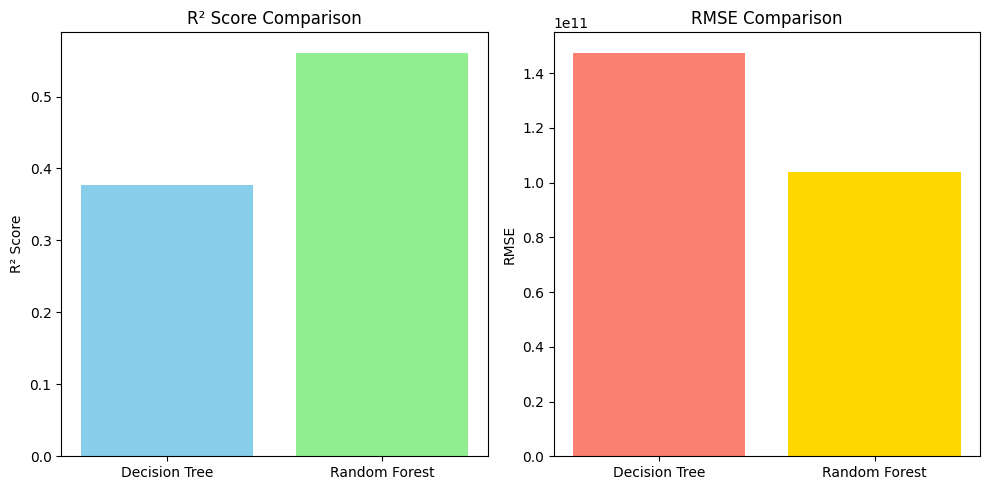

Decision Tree → R²: 0.377, RMSE: 147523548223.25
Random Forest → R²: 0.561, RMSE: 103866729733.19
Best RF Params: {'max_depth': None, 'min_samples_split': 2, 'n_estimators': 100}


In [8]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import r2_score, mean_squared_error

# Load the dataset
df = pd.read_csv("austinHousingData.csv")

# Select meaningful features and target
features = [
    'garageSpaces', 'parkingSpaces', 'yearBuilt', 'numPriceChanges', 'numOfPhotos',
    'lotSizeSqFt', 'livingAreaSqFt', 'avgSchoolDistance', 'avgSchoolRating',
    'avgSchoolSize', 'MedianStudentsPerTeacher', 'numOfBathrooms', 'numOfBedrooms'
]
target = 'latestPrice'

X = df[features]
y = df[target]

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 1. Decision Tree
dt_model = DecisionTreeRegressor(random_state=42)
dt_model.fit(X_train, y_train)
y_pred_dt = dt_model.predict(X_test)
dt_r2 = r2_score(y_test, y_pred_dt)
dt_rmse =mean_squared_error (y_test, y_pred_dt)

# 2. Random Forest + Hyperparameter Tuning
param_grid = {
    'n_estimators': [50, 100],
    'max_depth': [10, 20, None],
    'min_samples_split': [2, 5]
}
rf = RandomForestRegressor(random_state=42)
grid_search = GridSearchCV(rf, param_grid, cv=3, scoring='r2', n_jobs=-1)
grid_search.fit(X_train, y_train)

best_rf = grid_search.best_estimator_
y_pred_rf = best_rf.predict(X_test)
rf_r2 = r2_score(y_test, y_pred_rf)
rf_rmse = mean_squared_error(y_test, y_pred_rf)

# 3. Visualization
plt.figure(figsize=(10, 5))

# R² Scores
plt.subplot(1, 2, 1)
plt.bar(['Decision Tree', 'Random Forest'], [dt_r2, rf_r2], color=['skyblue', 'lightgreen'])
plt.title('R² Score Comparison')
plt.ylabel('R² Score')

# RMSE Scores
plt.subplot(1, 2, 2)
plt.bar(['Decision Tree', 'Random Forest'], [dt_rmse, rf_rmse], color=['salmon', 'gold'])
plt.title('RMSE Comparison')
plt.ylabel('RMSE')

plt.tight_layout()
plt.show()

# Print model metrics
print("Decision Tree → R²: {:.3f}, RMSE: {:.2f}".format(dt_r2, dt_rmse))
print("Random Forest → R²: {:.3f}, RMSE: {:.2f}".format(rf_r2, rf_rmse))
print("Best RF Params:", grid_search.best_params_)


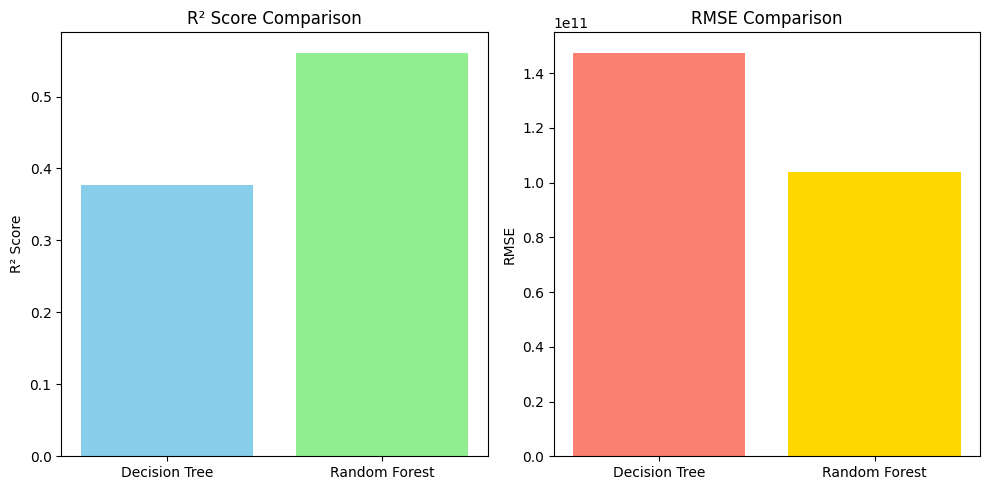

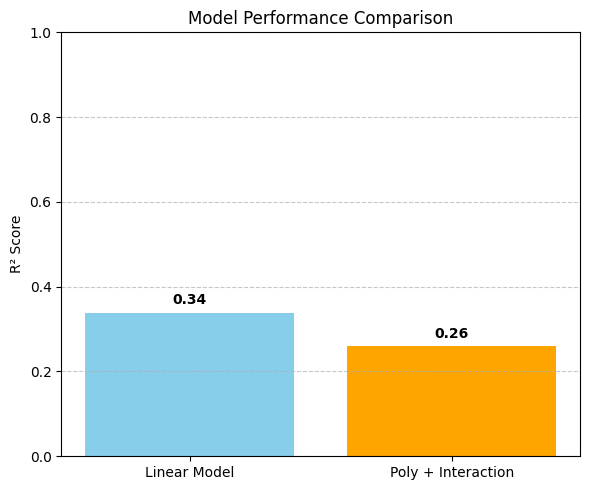

R² Scores:
Linear Model: 0.339
Polynomial + Interaction: 0.259
Decision Tree: 0.377
Random Forest: 0.561

RMSE Scores:
Decision Tree RMSE: 147523548223.25
Random Forest RMSE: 103866729733.19

Best Random Forest Params: {'max_depth': None, 'min_samples_split': 2, 'n_estimators': 100}


In [10]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import r2_score, mean_squared_error

# Load dataset
df = pd.read_csv("austinHousingData.csv")

# Feature selection
features = [
    'garageSpaces', 'parkingSpaces', 'yearBuilt', 'numPriceChanges', 'numOfPhotos',
    'lotSizeSqFt', 'livingAreaSqFt', 'avgSchoolDistance', 'avgSchoolRating',
    'avgSchoolSize', 'MedianStudentsPerTeacher', 'numOfBathrooms', 'numOfBedrooms'
]
target = 'latestPrice'

X = df[features]
y = df[target]

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# ========================
# Linear Model (Baseline)
# ========================
lr = LinearRegression()
lr.fit(X_train, y_train)
y_pred_base = lr.predict(X_test)
r2_base = r2_score(y_test, y_pred_base)

# =====================================
# Polynomial + Interaction Model
# =====================================
poly = PolynomialFeatures(degree=2, include_bias=False, interaction_only=False)
X_train_poly = poly.fit_transform(X_train)
X_test_poly = poly.transform(X_test)

lr_poly = LinearRegression()
lr_poly.fit(X_train_poly, y_train)
y_pred_poly = lr_poly.predict(X_test_poly)
r2_poly = r2_score(y_test, y_pred_poly)

# ========================
# Decision Tree
# ========================
dt = DecisionTreeRegressor(random_state=42)
dt.fit(X_train, y_train)
y_pred_dt = dt.predict(X_test)
r2_dt = r2_score(y_test, y_pred_dt)
rmse_dt = mean_squared_error(y_test, y_pred_dt)

# ========================
# Random Forest + Tuning
# ========================
param_grid = {
    'n_estimators': [50, 100],
    'max_depth': [10, 20, None],
    'min_samples_split': [2, 5]
}
rf = RandomForestRegressor(random_state=42)
grid = GridSearchCV(rf, param_grid, cv=3, scoring='r2', n_jobs=-1)
grid.fit(X_train, y_train)

best_rf = grid.best_estimator_
y_pred_rf = best_rf.predict(X_test)
r2_rf = r2_score(y_test, y_pred_rf)
rmse_rf = mean_squared_error(y_test, y_pred_rf)

# ========================
# Plot 1: R² & RMSE Comparison (Tree vs Forest)
# ========================
plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.bar(['Decision Tree', 'Random Forest'], [r2_dt, r2_rf], color=['skyblue', 'lightgreen'])
plt.title('R² Score Comparison')
plt.ylabel('R² Score')

plt.subplot(1, 2, 2)
plt.bar(['Decision Tree', 'Random Forest'], [rmse_dt, rmse_rf], color=['salmon', 'gold'])
plt.title('RMSE Comparison')
plt.ylabel('RMSE')

plt.tight_layout()
plt.show()

# ========================
# Plot 2: Linear vs Polynomial + Interaction
# ========================
plt.figure(figsize=(6, 5))
models = ['Linear Model', 'Poly + Interaction']
r2_scores = [r2_base, r2_poly]

plt.bar(models, r2_scores, color=['skyblue', 'orange'])
plt.ylabel("R² Score")
plt.title("Model Performance Comparison")
plt.ylim(0, 1)
for i, v in enumerate(r2_scores):
    plt.text(i, v + 0.02, f"{v:.2f}", ha='center', fontweight='bold')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

# ========================
# Print Results
# ========================
print("R² Scores:")
print(f"Linear Model: {r2_base:.3f}")
print(f"Polynomial + Interaction: {r2_poly:.3f}")
print(f"Decision Tree: {r2_dt:.3f}")
print(f"Random Forest: {r2_rf:.3f}")
print("\nRMSE Scores:")
print(f"Decision Tree RMSE: {rmse_dt:.2f}")
print(f"Random Forest RMSE: {rmse_rf:.2f}")
print("\nBest Random Forest Params:", grid.best_params_)



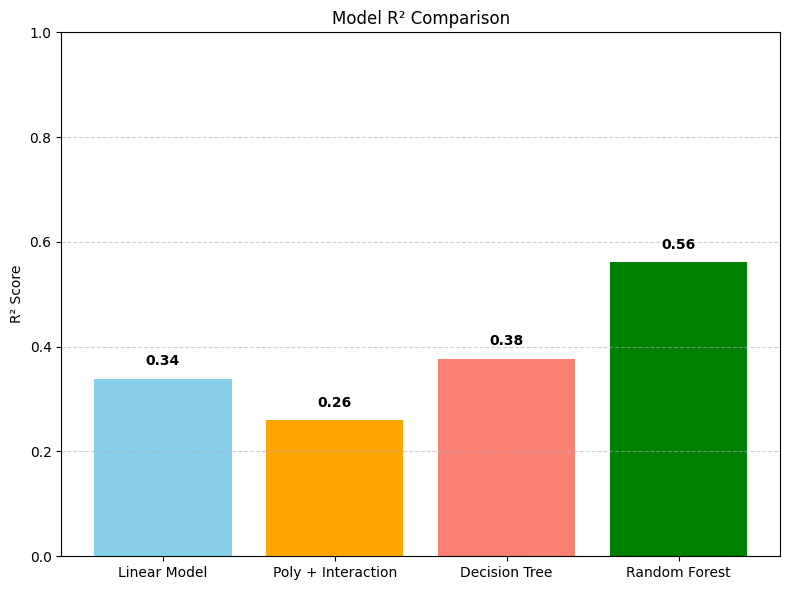

In [11]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import r2_score, mean_squared_error

# Load dataset
df = pd.read_csv("austinHousingData.csv")

# Define features and target
features = [
    'garageSpaces', 'parkingSpaces', 'yearBuilt', 'numPriceChanges', 'numOfPhotos',
    'lotSizeSqFt', 'livingAreaSqFt', 'avgSchoolDistance', 'avgSchoolRating',
    'avgSchoolSize', 'MedianStudentsPerTeacher', 'numOfBathrooms', 'numOfBedrooms'
]
target = 'latestPrice'

X = df[features]
y = df[target]

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Linear Model
lr = LinearRegression()
lr.fit(X_train, y_train)
r2_linear = r2_score(y_test, lr.predict(X_test))

# Polynomial + Interaction
poly = PolynomialFeatures(degree=2, include_bias=False)
X_train_poly = poly.fit_transform(X_train)
X_test_poly = poly.transform(X_test)

lr_poly = LinearRegression()
lr_poly.fit(X_train_poly, y_train)
r2_poly = r2_score(y_test, lr_poly.predict(X_test_poly))

# Decision Tree
dt = DecisionTreeRegressor(random_state=42)
dt.fit(X_train, y_train)
r2_dt = r2_score(y_test, dt.predict(X_test))

# Random Forest with tuning
param_grid = {
    'n_estimators': [50, 100],
    'max_depth': [10, 20, None],
    'min_samples_split': [2, 5]
}
rf = RandomForestRegressor(random_state=42)
grid = GridSearchCV(rf, param_grid, cv=3, scoring='r2', n_jobs=-1)
grid.fit(X_train, y_train)
rf_best = grid.best_estimator_
r2_rf = r2_score(y_test, rf_best.predict(X_test))

# ======================
# Unified R² Bar Chart
# ======================
model_names = [
    "Linear Model",
    "Poly + Interaction",
    "Decision Tree",
    "Random Forest"
]
r2_values = [r2_linear, r2_poly, r2_dt, r2_rf]

plt.figure(figsize=(8, 6))
bars = plt.bar(model_names, r2_values, color=['skyblue', 'orange', 'salmon', 'green'])
plt.ylabel("R² Score")
plt.title("Model R² Comparison")
plt.ylim(0, 1)
plt.grid(axis='y', linestyle='--', alpha=0.6)

# Annotate bars
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, height + 0.02, f"{height:.2f}",
             ha='center', va='bottom', fontweight='bold')

plt.tight_layout()
plt.show()


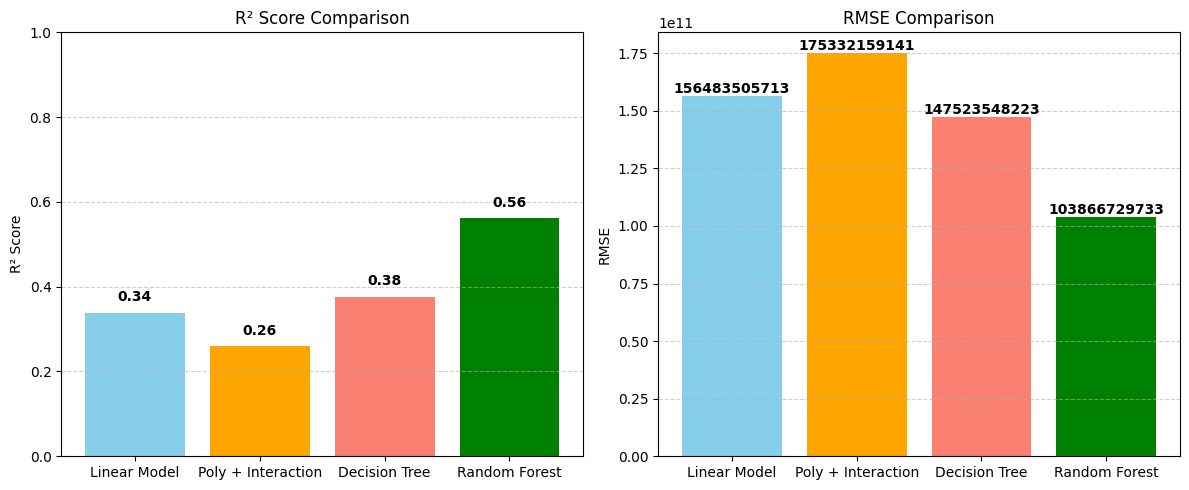

In [14]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import r2_score, mean_squared_error

# Load dataset
df = pd.read_csv("austinHousingData.csv")

# Define features and target
features = [
    'garageSpaces', 'parkingSpaces', 'yearBuilt', 'numPriceChanges', 'numOfPhotos',
    'lotSizeSqFt', 'livingAreaSqFt', 'avgSchoolDistance', 'avgSchoolRating',
    'avgSchoolSize', 'MedianStudentsPerTeacher', 'numOfBathrooms', 'numOfBedrooms'
]
target = 'latestPrice'

X = df[features]
y = df[target]

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Linear Model
lr = LinearRegression()
lr.fit(X_train, y_train)
y_pred_linear = lr.predict(X_test)
r2_linear = r2_score(y_test, y_pred_linear)
rmse_linear = mean_squared_error(y_test, y_pred_linear)

# Polynomial + Interaction Model
poly = PolynomialFeatures(degree=2, include_bias=False)
X_train_poly = poly.fit_transform(X_train)
X_test_poly = poly.transform(X_test)

lr_poly = LinearRegression()
lr_poly.fit(X_train_poly, y_train)
y_pred_poly = lr_poly.predict(X_test_poly)
r2_poly = r2_score(y_test, y_pred_poly)
rmse_poly = mean_squared_error(y_test, y_pred_poly)

# Decision Tree Model
dt = DecisionTreeRegressor(random_state=42)
dt.fit(X_train, y_train)
y_pred_dt = dt.predict(X_test)
r2_dt = r2_score(y_test, y_pred_dt)
rmse_dt = mean_squared_error(y_test, y_pred_dt)

# Random Forest Model with Hyperparameter Tuning
param_grid = {
    'n_estimators': [50, 100],
    'max_depth': [10, 20, None],
    'min_samples_split': [2, 5]
}
rf = RandomForestRegressor(random_state=42)
grid = GridSearchCV(rf, param_grid, cv=3, scoring='r2', n_jobs=-1)
grid.fit(X_train, y_train)
best_rf = grid.best_estimator_
y_pred_rf = best_rf.predict(X_test)
r2_rf = r2_score(y_test, y_pred_rf)
rmse_rf = mean_squared_error(y_test, y_pred_rf)

# Model Names and Scores
model_names = [
    "Linear Model", "Poly + Interaction", "Decision Tree", "Random Forest"
]
r2_scores = [r2_linear, r2_poly, r2_dt, r2_rf]
rmse_scores = [rmse_linear, rmse_poly, rmse_dt, rmse_rf]

# Plot R² and RMSE side by side
plt.figure(figsize=(12, 5))

# R² Plot
plt.subplot(1, 2, 1)
bars = plt.bar(model_names, r2_scores, color=['skyblue', 'orange', 'salmon', 'green'])
plt.title("R² Score Comparison")
plt.ylabel("R² Score")
plt.ylim(0, 1)
plt.grid(axis='y', linestyle='--', alpha=0.6)
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, height + 0.02, f"{height:.2f}",
             ha='center', va='bottom', fontweight='bold')

# RMSE Plot
plt.subplot(1, 2, 2)
bars = plt.bar(model_names, rmse_scores, color=['skyblue', 'orange', 'salmon', 'green'])
plt.title("RMSE Comparison")
plt.ylabel("RMSE")
plt.grid(axis='y', linestyle='--', alpha=0.6)
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, height + 0.02, f"{height:.0f}",
             ha='center', va='bottom', fontweight='bold')

plt.tight_layout()
plt.show()


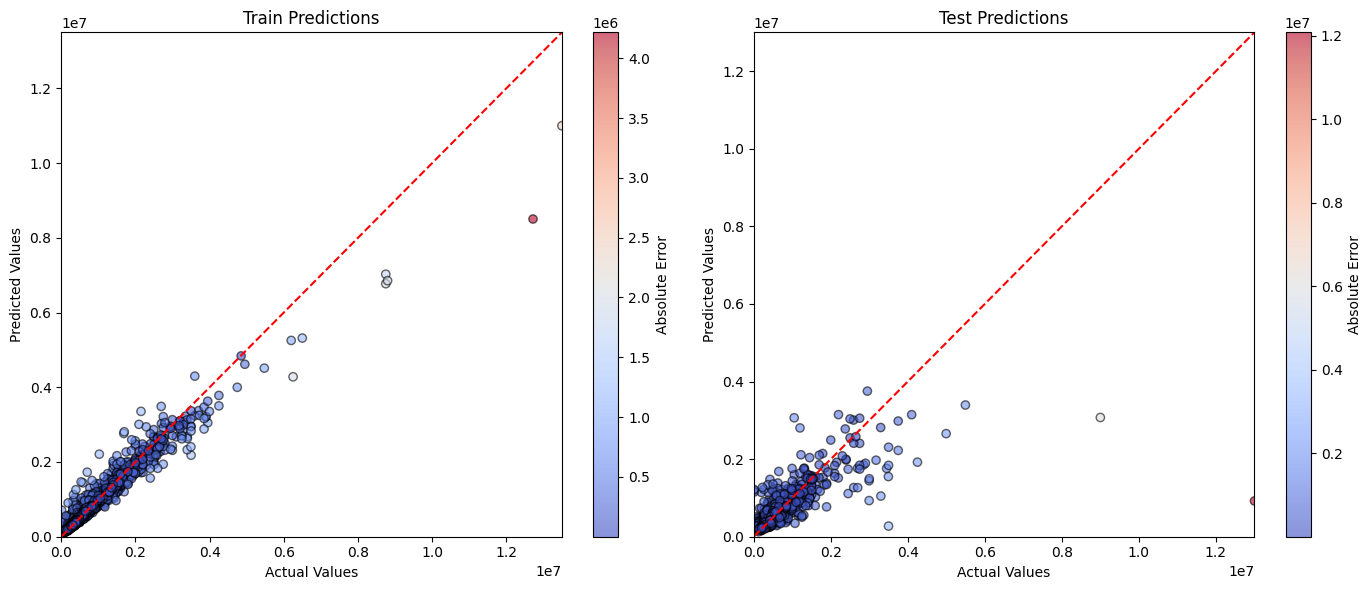

In [2]:
# Re-import libraries and re-run the model + scatter plot after code reset

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

# Reload dataset
file_path = "austinHousingData.csv"
df = pd.read_csv(file_path)

# Define features and target
features = [
    'garageSpaces', 'parkingSpaces', 'yearBuilt', 'numPriceChanges', 'numOfPhotos',
    'lotSizeSqFt', 'livingAreaSqFt', 'avgSchoolDistance', 'avgSchoolRating',
    'avgSchoolSize', 'MedianStudentsPerTeacher', 'numOfBathrooms', 'numOfBedrooms'
]
target = 'latestPrice'

X = df[features]
y = df[target]

# Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train Random Forest Regressor
rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

# Predict on train and test sets
y_train_pred = rf.predict(X_train)
y_test_pred = rf.predict(X_test)

# Calculate absolute errors
train_errors = np.abs(y_train - y_train_pred)
test_errors = np.abs(y_test - y_test_pred)

# Create scatter plots for predictions
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# Train Predictions Plot
train_scatter = axes[0].scatter(
    y_train, y_train_pred, c=train_errors, cmap='coolwarm', edgecolor='k', alpha=0.6
)
axes[0].plot([y_train.min(), y_train.max()], [y_train.min(), y_train.max()], 'r--')
axes[0].set_title("Train Predictions")
axes[0].set_xlabel("Actual Values")
axes[0].set_ylabel("Predicted Values")
axes[0].set_xlim([0, y_train.max()])
axes[0].set_ylim([0, y_train.max()])
fig.colorbar(train_scatter, ax=axes[0], label="Absolute Error")

# Test Predictions Plot
test_scatter = axes[1].scatter(
    y_test, y_test_pred, c=test_errors, cmap='coolwarm', edgecolor='k', alpha=0.6
)
axes[1].plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
axes[1].set_title("Test Predictions")
axes[1].set_xlabel("Actual Values")
axes[1].set_ylabel("Predicted Values")
axes[1].set_xlim([0, y_test.max()])
axes[1].set_ylim([0, y_test.max()])
fig.colorbar(test_scatter, ax=axes[1], label="Absolute Error")

plt.tight_layout()
plt.show()


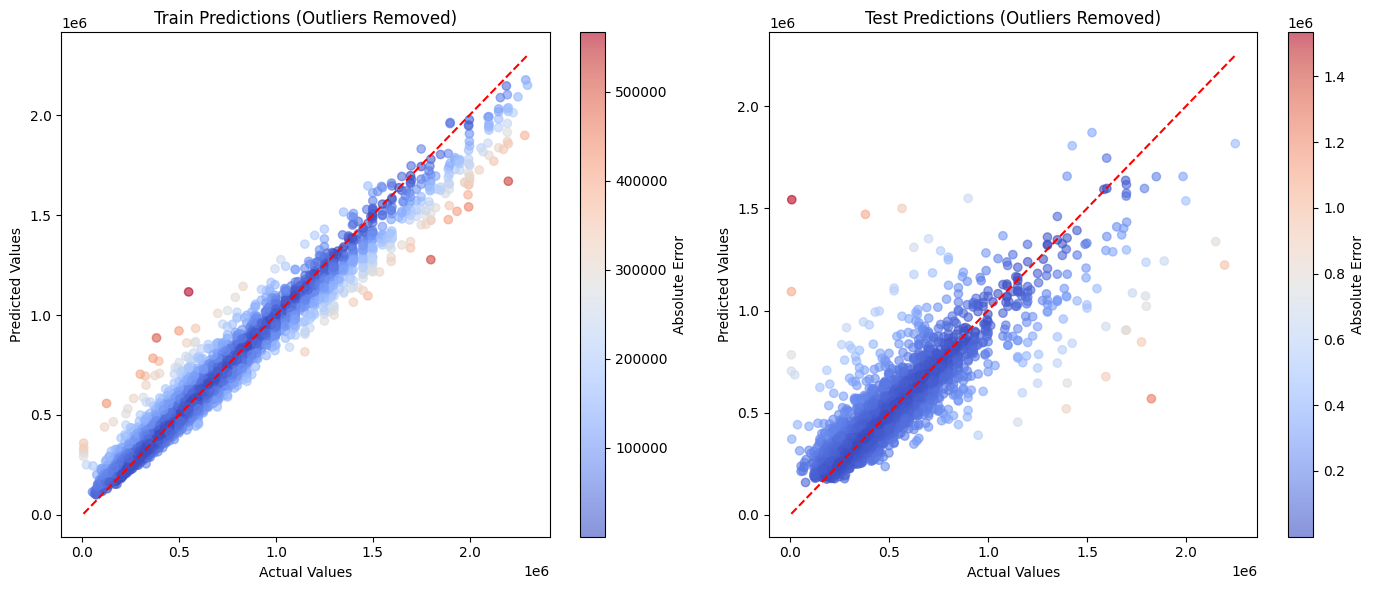

In [3]:
# Remove extreme outliers from both train and test sets to improve visibility in the scatter plots
# We'll clip the target variable at the 99th percentile to remove top 1% extreme values

# Re-split the data
X = df[features]
y = df[target]

# Define upper limit for clipping
upper_limit = y.quantile(0.99)

# Filter dataset
mask = y < upper_limit
X_filtered = X[mask]
y_filtered = y[mask]

# Re-train/test split
X_train, X_test, y_train, y_test = train_test_split(X_filtered, y_filtered, test_size=0.2, random_state=42)

# Refit Random Forest on clipped data
rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

# Predictions and errors
y_train_pred = rf.predict(X_train)
y_test_pred = rf.predict(X_test)
train_errors = np.abs(y_train - y_train_pred)
test_errors = np.abs(y_test - y_test_pred)

# Plot updated scatter plots
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# Train Plot
train_scatter = axes[0].scatter(
    y_train, y_train_pred, c=train_errors, cmap='coolwarm', alpha=0.6
)
axes[0].plot([y_train.min(), y_train.max()], [y_train.min(), y_train.max()], 'r--')
axes[0].set_title("Train Predictions (Outliers Removed)")
axes[0].set_xlabel("Actual Values")
axes[0].set_ylabel("Predicted Values")
fig.colorbar(train_scatter, ax=axes[0], label="Absolute Error")

# Test Plot
test_scatter = axes[1].scatter(
    y_test, y_test_pred, c=test_errors, cmap='coolwarm', alpha=0.6
)
axes[1].plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
axes[1].set_title("Test Predictions (Outliers Removed)")
axes[1].set_xlabel("Actual Values")
axes[1].set_ylabel("Predicted Values")
fig.colorbar(test_scatter, ax=axes[1], label="Absolute Error")

plt.tight_layout()
plt.show()
